#### Objective: Vector Data Analysis 

##### Step 1: Import necessary packages

In [1]:
# pip install geopandas

In [2]:
# pip install matplotlib

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

##### Step 2: Load the data and plot it

<Axes: >

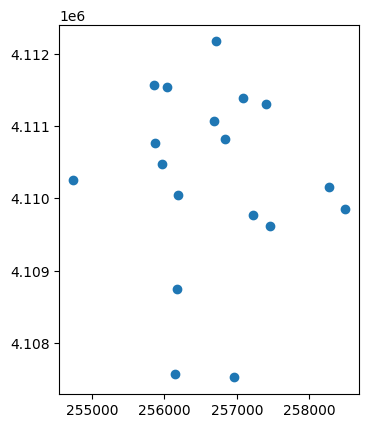

In [4]:
# read the shapefile "SJER_plot_centroids.shp" and plot it
sjer_centroid = gpd.read_file('data/1_vectorAnalysis/SJER_plot_centroids.shp')
# plot the shapefile to see its contents 
sjer_centroid.plot()

##### Step 3: Explore the attribute table of the "SJER_crop.shp"

In [5]:
# Understand the coordinate reference system of the data
sjer_centroid.crs
# 1. EPSG Code of the CRS : 32611
print(f"EPSG Code of the CRS : {sjer_centroid.crs.to_epsg()}")
# 2. Name of the CRS : WGS 84 / UTM zone 11N
# 3. Unit : metre
# 4. Datum : World Geodetic System 1984 ensemble
# 5. Prime Meridian : Greenwich

EPSG Code of the CRS : 32611


In [6]:
# read the shapefile "SJER_crop.shp"
sjer_crop= gpd.read_file('data/1_vectorAnalysis/SJER_crop.shp')
# find out how many data records or rows are there in the shapefile using your shapefile object
len(sjer_crop)

1

##### Step 4: Plotting both shapefiles on a single map

<Axes: >

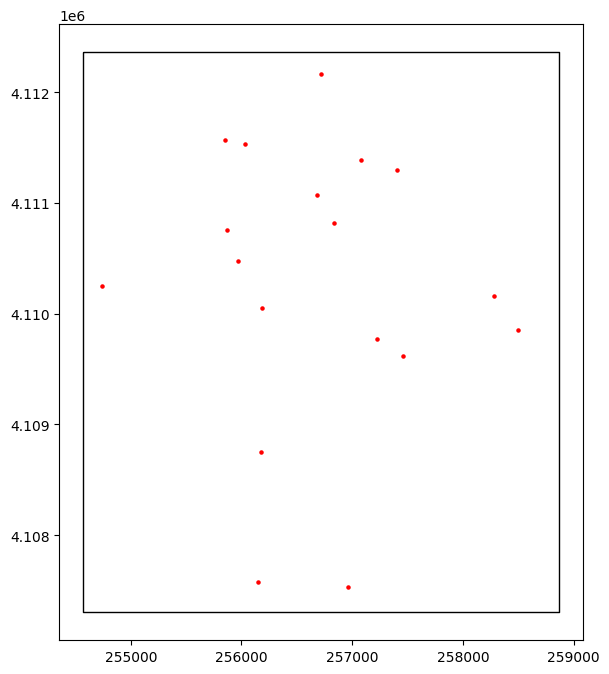

In [7]:
# create a map showing contents of both shapefiles - “SJER_plot_centroids.shp” and “SJER_crop.shp”
fig, ax = plt.subplots(figsize=(10,8))
sjer_crop.plot(ax=ax, color="white", edgecolor="black")
sjer_centroid.plot(ax=ax, color="red",markersize=5)

##### Step 5: Creating a buffer

<Axes: >

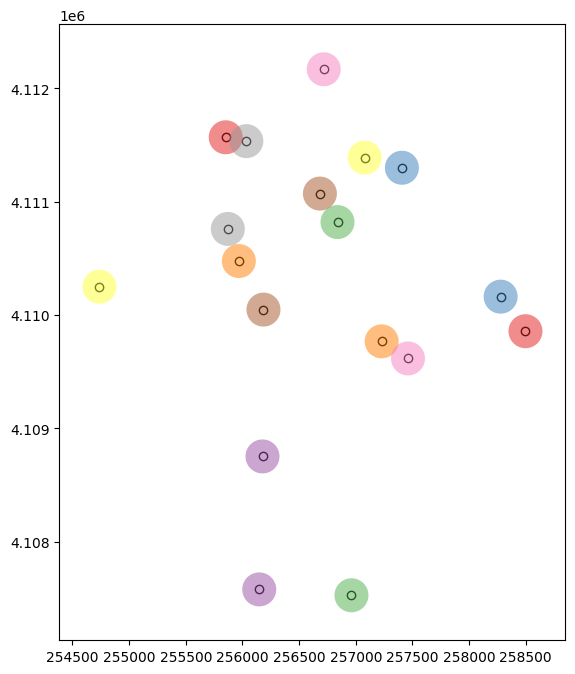

In [8]:
# For the “SJER_plot_centroids.shp”, create a buffer of 150m and show it on the map
sjer_centroid_buffer = sjer_centroid.geometry.buffer(150)
fig, ax = plt.subplots(figsize=(8,8))
sjer_centroid.plot(ax=ax, color="white", edgecolor="black")
sjer_centroid_buffer.plot(ax=ax, cmap=plt.get_cmap("Set1"),
alpha=0.5)

##### Step 6: Overlay difference to get the area NOT within 150 meters of the sites

<Axes: >

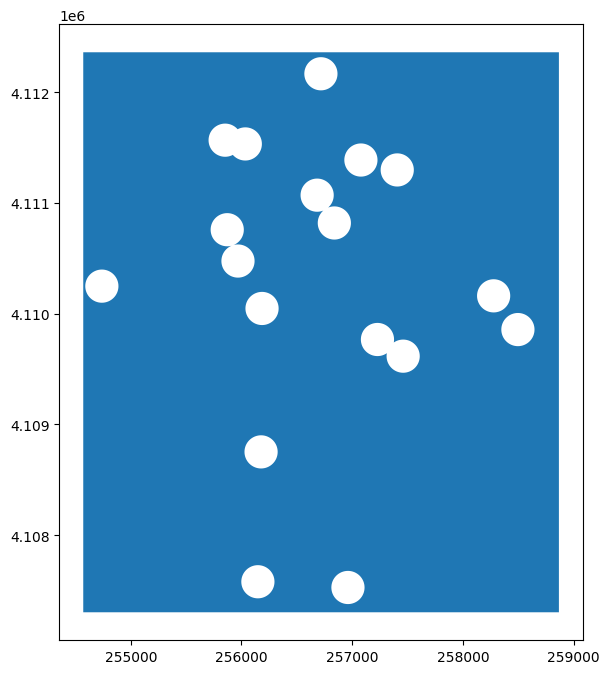

In [9]:
# Use the “SJER_crop.shp” and the buffered “SJER_plot_centroids.shp” (created in previous task)
# Apply overlay difference operation to obtain the area not within 150m of the sites
intersected_centroid_gdf = gpd.GeoDataFrame({'geometry':sjer_centroid_buffer}, crs="EPSG:32611")
areas_not_near = gpd.overlay(sjer_crop,intersected_centroid_gdf,how='difference')

# Plot to see
areas_not_near.plot(figsize=(8,8))